In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [27]:
calories=pd.read_csv('C:/Users/0&1/Downloads/burnt/calories.csv')

In [28]:
#print the first 5 rows of the calories dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [29]:
exercise_data=pd.read_csv('C:/Users/0&1/Downloads/burnt/exercise.csv')

In [30]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [31]:
#Combining the two Dataframes
data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [32]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [33]:
#Checking the number of rows and columns
data.shape

(15000, 9)

In [34]:
#Getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
User_ID       15000 non-null int64
Gender        15000 non-null object
Age           15000 non-null int64
Height        15000 non-null float64
Weight        15000 non-null float64
Duration      15000 non-null float64
Heart_Rate    15000 non-null float64
Body_Temp     15000 non-null float64
Calories      15000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [35]:
#Checking for missing values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [36]:
#Descriptive Statistics 
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


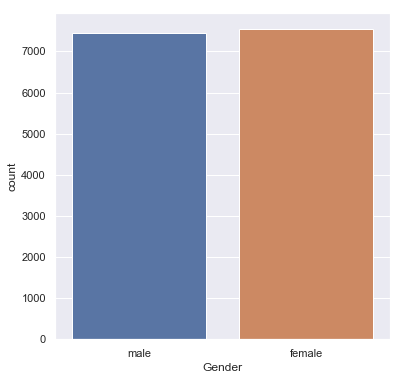

In [43]:
#Data Visualization
#plotting the Gender column in count plot
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.Gender)
plt.show()

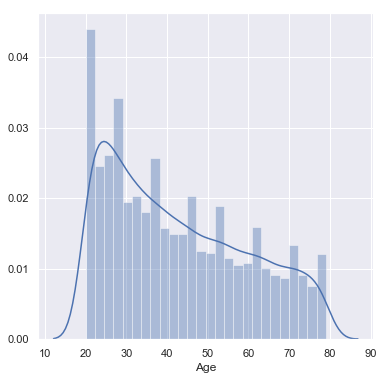

In [50]:
#Finding the distribution of 'Age' column
plt.figure(figsize=(6,6))
sns.distplot(data.Age)
plt.show()

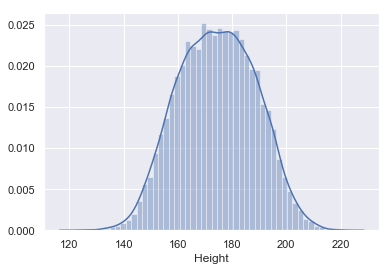

In [51]:
#Finding the distribution of 'Height' column

sns.distplot(data.Height)
plt.show()

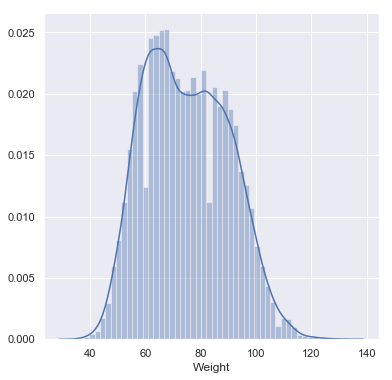

In [52]:
#Finding the distribution of 'Weight' column
plt.figure(figsize=(6,6))
sns.distplot(data.Weight)
plt.show()

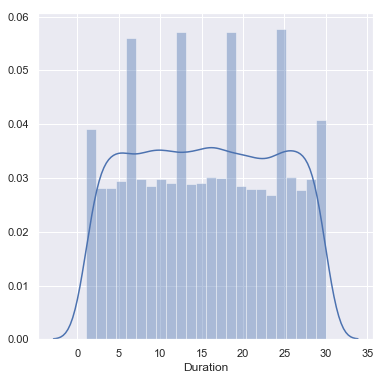

In [53]:
#Finding the distribution of 'Duration' column
plt.figure(figsize=(6,6))
sns.distplot(data.Duration)
plt.show()

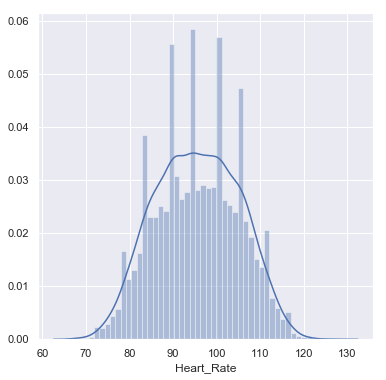

In [54]:
#Finding the distribution of 'Heart_Rate' column
plt.figure(figsize=(6,6))
sns.distplot(data.Heart_Rate)
plt.show()

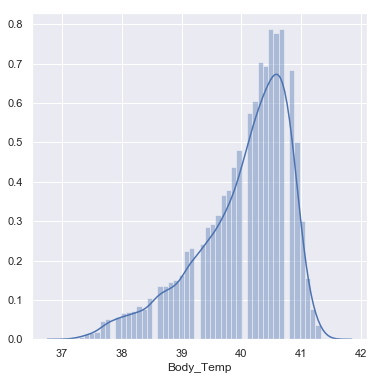

In [55]:
#Finding the distribution of 'Body_Temp' column
plt.figure(figsize=(6,6))
sns.distplot(data.Body_Temp)
plt.show()

In [58]:
correlation = data.corr()

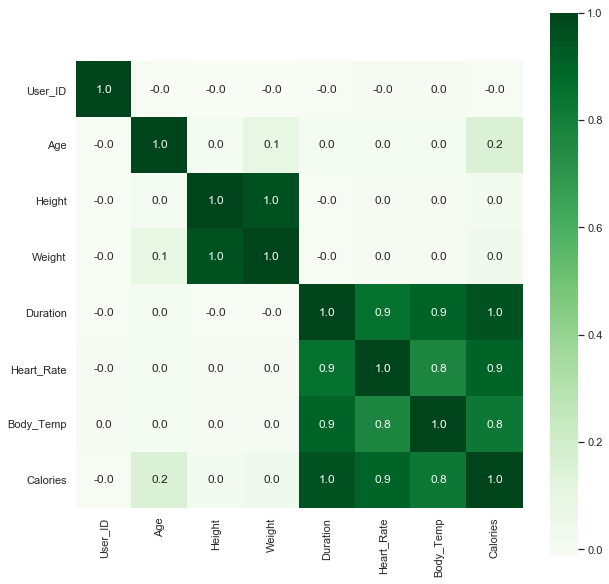

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True, cmap='Greens')

In [60]:
#Converting the text data in 'Gender' column to numerical values
data.replace({"Gender":{'male':0,'female':1}},inplace=True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [64]:
#Seperating features and Target
X=data.drop(columns=['User_ID','Calories'],axis=1)
Y=data['Calories']

In [65]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
5,1,36,151.0,50.0,23.0,96.0,40.7
6,1,33,158.0,56.0,22.0,95.0,40.5
7,0,41,175.0,85.0,25.0,100.0,40.7
8,0,60,186.0,94.0,21.0,97.0,40.4
9,1,26,146.0,51.0,16.0,90.0,40.2


In [66]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
5        123.0
6        112.0
7        143.0
8        134.0
9         72.0
10         3.0
11        92.0
12        58.0
13        88.0
14         7.0
15       170.0
16        11.0
17        43.0
18        15.0
19        74.0
20        29.0
21        32.0
22        10.0
23       155.0
24         3.0
25        24.0
26        12.0
27        10.0
28       195.0
29         5.0
         ...  
14970     74.0
14971     20.0
14972    162.0
14973     65.0
14974    142.0
14975     90.0
14976    221.0
14977     86.0
14978     40.0
14979     84.0
14980     10.0
14981     85.0
14982     86.0
14983    130.0
14984    119.0
14985     13.0
14986     78.0
14987    131.0
14988    143.0
14989    245.0
14990     89.0
14991     44.0
14992     46.0
14993     60.0
14994     52.0
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [67]:
#Splitting the data into training data and Test data
X_train, X_test, Y_train , Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [68]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [69]:
#Model Training
#XGBoost Regressor
#loading the model 
model=XGBRegressor()

In [70]:
#Training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='',
       learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
       max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
       missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
#Evaluation
#Prediction on Test Data
test_data_prediction=model.predict(X_test)

In [72]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [73]:
#Mean Absolute Error
#Using Linear Regression Model
#Importing Linear Regression Model
from sklearn.linear_model import LinearRegression

In [74]:
#We have already converted the categorical gender column and selected the featueres along with target
#We also have splitted our data into training and testing data so we do model training using linear regression
#Performing Standardisation
#Standardizing
from sklearn.preprocessing import StandardScaler

In [75]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [76]:
#loading the linear regression model 
reg=LinearRegression()

In [77]:
#Training our Linear Rigression Model to find the equation of our linear regression model
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
#Model Evaluation
#prediction on testing data
Y_pred=reg.predict(X_test)

In [79]:
#Comparing the Values predicted by our model by using r squared error
metrics.r2_score(Y_test,Y_pred)

0.9668790377181355

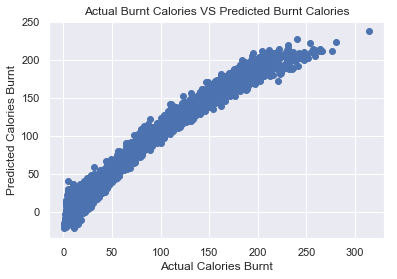

In [80]:
#Visualising the the actaul burnt calories and the Predicted burnt calories
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual Burnt Calories VS Predicted Burnt Calories")
plt.show()


In [81]:
#Using Random Forest Regressor Model
#Importing random forest regressor model 
from sklearn.ensemble import RandomForestRegressor

In [82]:
#Loading RandomForestRegressor to RandomForest variable.
RandomForest=RandomForestRegressor(n_estimators=100)

In [83]:
#Training the Model
RandomForest.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [84]:
#Model Evaluation
Y_pred=RandomForest.predict(X_test)
Y_pred

array([128.32, 221.46,  37.09, ..., 145.64,  23.81,  89.62])

In [85]:
#Using R square metric for evaluation
error_score =metrics.r2_score(Y_test,Y_pred)
print("Rsquared Error Score = " , error_score)

Rsquared Error Score =  0.9982053089595866


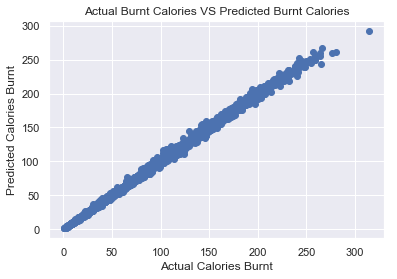

In [86]:
#Visualising the acual calories burnt and the predicted calories burnt
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual Burnt Calories VS Predicted Burnt Calories")
plt.show()

In [87]:
#Visualising the same result in a plot
#preventing from error
Y_testlist=list(Y_test)

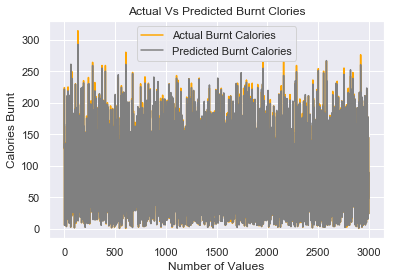

In [88]:
#plotting the actual burnt calories (Y_testlist) in orange color and the predicted burnt calories (Y_pred) in grey color
plt.plot(Y_testlist, color="orange", label = 'Actual Burnt Calories')
plt.plot(Y_pred, color="grey", label = 'Predicted Burnt Calories')
plt.title("Actual Vs Predicted Burnt Clories")
plt.xlabel("Number of Values")
plt.ylabel("Calories Burnt")
plt.legend()
plt.show()

In [89]:
#We  see that the actual Burnt Calories is slightly more than the predicted value which is not too much
#considering our 0.99 error obtained in our R squared score, so
#Random Forest Regressor Algorithm is best suited our current ML model predicting the calories burnt during exercise.